In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = '/kaggle/input/heart-attack-risk-assessment-dataset/updated_version.csv'
HAR = pd.read_csv(file_path)

In [3]:
HAR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   sex                1000 non-null   int64  
 2   total_cholesterol  1000 non-null   float64
 3   ldl                1000 non-null   float64
 4   hdl                1000 non-null   float64
 5   systolic_bp        1000 non-null   float64
 6   diastolic_bp       1000 non-null   float64
 7   smoking            1000 non-null   int64  
 8   diabetes           1000 non-null   int64  
 9   heart_attack       1000 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 78.2 KB


In [4]:
HAR.describe()

,age,sex,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.886000,0.52700,201.087486,130.047807,49.811244,120.312687,80.231248,0.202000,0.090000,0.104000
std,14.209466,0.49952,40.042655,30.041659,10.247178,15.507493,10.235917,0.401693,0.286325,0.305413
min,18.000000,0.00000,84.165932,36.259745,20.600644,74.433950,49.296305,0.000000,0.000000,0.000000
25%,40.000000,0.00000,174.707208,111.963197,42.622102,110.062952,73.277119,0.000000,0.000000,0.000000
50%,49.000000,1.00000,201.191547,130.678540,49.682809,120.042175,79.912592,0.000000,0.000000,0.000000
75%,59.000000,1.00000,226.251708,149.732446,56.703598,130.911804,87.084443,0.000000,0.000000,0.000000
max,94.000000,1.00000,354.660015,231.376631,82.319810,164.080967,113.848127,1.000000,1.000000,1.000000


In [5]:
HAR.head(10)

,age,sex,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack
0,57,1,229.463642,175.879129,39.225687,124.070127,91.378780,0,0,0
1,58,1,186.464120,128.984916,34.950968,95.492552,64.355040,1,0,0
2,37,1,251.300719,152.347592,45.913288,99.519335,64.953147,0,1,0
3,55,1,192.058908,116.803684,67.208925,122.460002,73.821382,0,0,0
4,53,1,151.203448,107.017396,60.693838,123.022257,81.121946,0,1,0
5,39,1,236.033455,153.880809,31.208614,121.857396,79.589069,0,0,0
6,65,0,174.615665,114.029407,55.692586,135.605050,85.529955,0,0,0
7,33,0,242.919402,147.951375,54.439475,123.511557,77.331714,0,0,0
8,49,0,95.804359,83.304875,60.758929,111.697488,77.630529,1,0,0
9,55,0,181.360943,106.011783,50.576747,129.576418,87.588781,0,0,0


# **Data Visualization**

In [6]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

<ipython-input-6-3b18b9ececc6>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


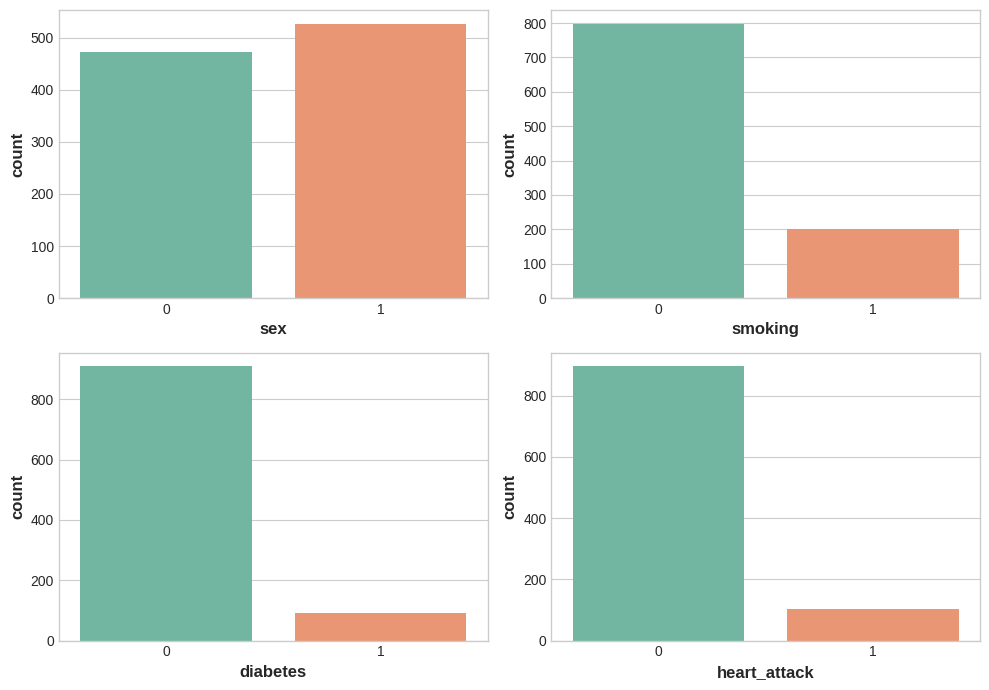

In [29]:
features = [['sex', 'smoking'], ['diabetes', 'heart_attack']]
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 7))

for i, feature in enumerate(features[0]):
    sns.countplot(x=HAR[feature],ax = ax[0][i], palette = 'Set2')

for i, feature in enumerate(features[1]):
    sns.countplot(x=HAR[feature],ax = ax[1][i], palette = 'Set2')

# **Data Featuring**

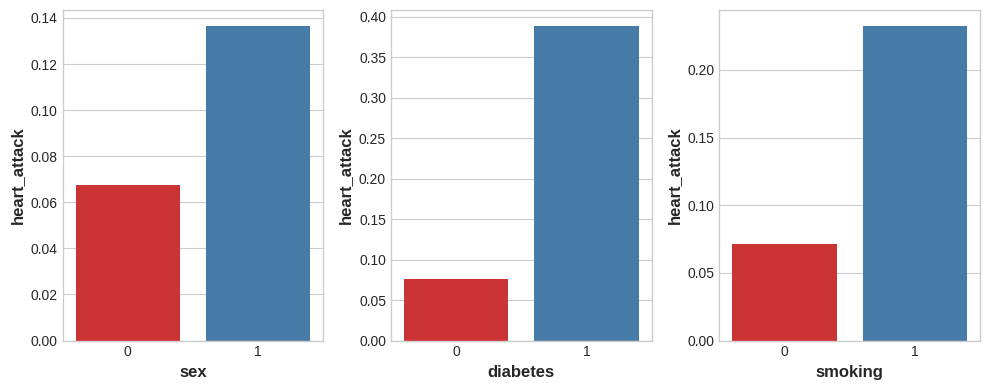

In [27]:
features = ['sex', 'diabetes', 'smoking']
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(10, 4))

for i, feature in enumerate(features):
    proportions = HAR.groupby(feature)['heart_attack'].mean().reset_index()
    sns.barplot(x=feature, y='heart_attack', ax = ax[i], data=proportions, palette='Set1')

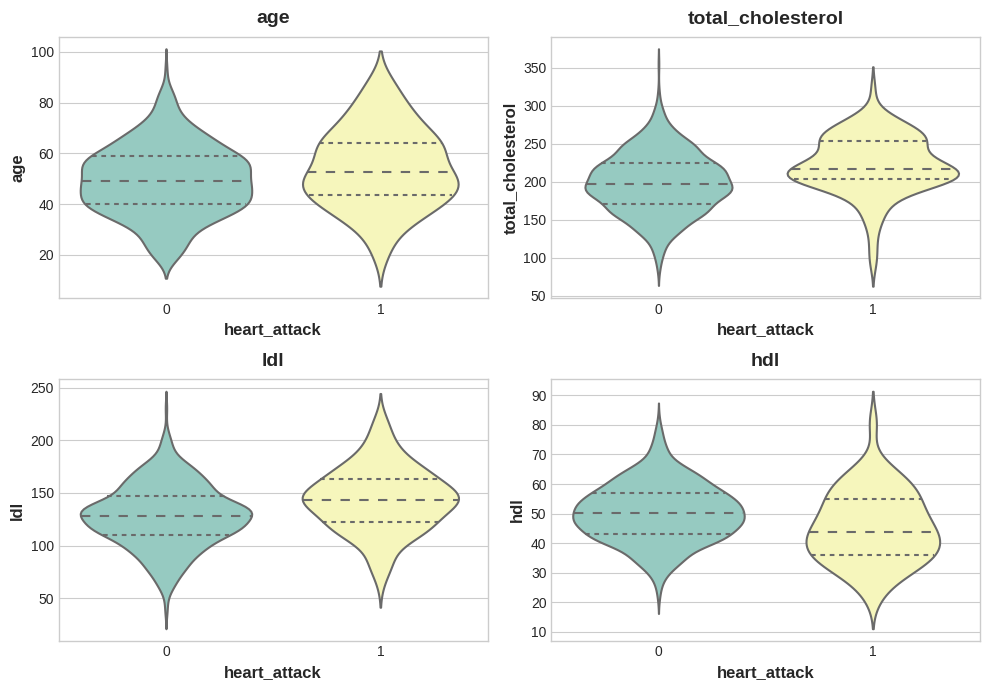

In [30]:
features = [['age', 'total_cholesterol'], ['ldl', 'hdl']]

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 7))

for i, feature in enumerate(features[0]):
    sns.violinplot(x = 'heart_attack', y = feature, ax = ax[0][i], data=HAR, inner='quartile', palette='Set3')
    ax[0][i].set_title(feature)

for i, feature in enumerate(features[1]):
    sns.violinplot(x = 'heart_attack', y = feature, ax = ax[1][i], data=HAR, inner='quartile', palette='Set3')
    ax[1][i].set_title(feature)

In [15]:
print(HAR.corr()['heart_attack'])

age                  0.109068
sex                  0.112803
total_cholesterol    0.176904
ldl                  0.158965
hdl                 -0.145338
systolic_bp          0.174377
diastolic_bp         0.174423
smoking              0.212076
diabetes             0.293498
heart_attack         1.000000
Name: heart_attack, dtype: float64
